

# Project: No _show appointment data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction
no_show Appointment data will be examined and analyzed, and more patients who have not appeared will be appreciated

Q1-Is age related to attendance at the appointment?
Q2-Can messages sent help the patient attend?


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [1]:
#load the data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

NameError: name 'pd' is not defined

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [4]:
#Number of columns 14 and number of rows 110527
df.shape

(110527, 14)

In [5]:
#Data summary 
#Age will be processed to be less than 0 and the data type will be converted to appointment ID, patient ID to string  because data is not numeric to be analyzed
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [6]:
#to know miss data and data type here, we have no data missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#We have no duplicate data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [8]:
#Age will be processed to be less than or equol 0
df = df[df["Age"] >= 0]

In [9]:
#the data type will be converted to appointment ID, patient ID to string  because data is not numeric to be analyzed
df['PatientId'] = df['PatientId'].astype(object)
df['AppointmentID'] = df['AppointmentID'].astype(object)


In [10]:
#Create a column for age groups so that they are:
#0 (0-15)
#1 (16-31)
#2 (16-31)
#3 (48-63)
#4 64+
bins = [0,16,32,48,63,115]
labels =[0,1,2,3,4]
df['bins'] = pd.cut(df['Age'], bins=bins,labels=labels, include_lowest=True) 

In [140]:
# this creates a new column
## True if No_show is "Yes"
## False if No_show is "No"
df['No_show_num'] = df['No-show'] == "Yes"
# Change the variable to an integer
df['No_show_num'] = df['No_show_num'].astype(int)

In [141]:
df.describe()

Age    Scholarship   Hipertension       Diabetes  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean       37.089219       0.098266       0.197248       0.071865   
std        23.110026       0.297676       0.397923       0.258266   
min         0.000000       0.000000       0.000000       0.000000   
25%        18.000000       0.000000       0.000000       0.000000   
50%        37.000000       0.000000       0.000000       0.000000   
75%        55.000000       0.000000       0.000000       0.000000   
max       115.000000       1.000000       1.000000       1.000000   

          Alcoholism        Handcap   SMS_received    No_show_num  
count  110526.000000  110526.000000  110526.000000  110526.000000  
mean        0.030400       0.022248       0.321029       0.201934  
std         0.171686       0.161543       0.466874       0.401445  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       1.000000       0.000000  
max         1.000000       4.000000       1.000000       1.000000

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110526 non-null  object  
 1   AppointmentID   110526 non-null  object  
 2   Gender          110526 non-null  object  
 3   ScheduledDay    110526 non-null  object  
 4   AppointmentDay  110526 non-null  object  
 5   Age             110526 non-null  int64   
 6   Neighbourhood   110526 non-null  object  
 7   Scholarship     110526 non-null  int64   
 8   Hipertension    110526 non-null  int64   
 9   Diabetes        110526 non-null  int64   
 10  Alcoholism      110526 non-null  int64   
 11  Handcap         110526 non-null  int64   
 12  SMS_received    110526 non-null  int64   
 13  No-show         110526 non-null  object  
 14  bins            110526 non-null  category
 15  No_show_num     110526 non-null  int32   
dtypes: category(1), int32(1), int64(7), ob

In [143]:
df.head(50)

PatientId AppointmentID Gender          ScheduledDay  \
0   2.98725e+13       5642903      F  2016-04-29T18:38:08Z   
1   5.58998e+14       5642503      M  2016-04-29T16:08:27Z   
2   4.26296e+12       5642549      F  2016-04-29T16:19:04Z   
3   8.67951e+11       5642828      F  2016-04-29T17:29:31Z   
4   8.84119e+12       5642494      F  2016-04-29T16:07:23Z   
5   9.59851e+13       5626772      F  2016-04-27T08:36:51Z   
6   7.33688e+14       5630279      F  2016-04-27T15:05:12Z   
7   3.44983e+12       5630575      F  2016-04-27T15:39:58Z   
8   5.63947e+13       5638447      F  2016-04-29T08:02:16Z   
9   7.81246e+13       5629123      F  2016-04-27T12:48:25Z   
10  7.34536e+14       5630213      F  2016-04-27T14:58:11Z   
11  7.54295e+12       5620163      M  2016-04-26T08:44:12Z   
12  5.66655e+14       5634718      F  2016-04-28T11:33:51Z   
13  9.11395e+14       5636249      M  2016-04-28T14:52:07Z   
14  9.98847e+13       5633951      F  2016-04-28T10:06:24Z   
15  9.99484e+10       5620206      F  2016-04-26T08:47:27Z   
16  8.45744e+13       5633121      M  2016-04-28T08:51:47Z   
17   1.4795e+13       5633460      F  2016-04-28T09:28:57Z   
18  1.71354e+13       5621836      F  2016-04-26T10:54:18Z   
19  7.22329e+12       5640433      F  2016-04-29T10:43:14Z   
20  6.22257e+14       5626083      F  2016-04-27T07:51:14Z   
21  1.21548e+13       5628338      F  2016-04-27T10:50:45Z   
22   8.6323e+14       5616091      M  2016-04-25T13:29:16Z   
23  2.13754e+14       5634142      F  2016-04-28T10:27:05Z   
24  8.73486e+12       5641780      F  2016-04-29T14:19:19Z   
25  5.81937e+12       5624020      M  2016-04-26T15:04:17Z   
26  2.57879e+10       5641781      F  2016-04-29T14:19:42Z   
27  1.21548e+13       5628345      F  2016-04-27T10:51:45Z   
28  5.92617e+12       5642400      M  2016-04-29T15:48:02Z   
29  1.22578e+12       5642186      F  2016-04-29T15:16:29Z   
30  3.42816e+11       5628068      F  2016-04-27T10:24:52Z   
31  3.11285e+11       5628907      M  2016-04-27T12:07:14Z   
32  5.28836e+13       5637908      M  2016-04-29T07:30:27Z   
33  7.65352e+12       5616921      F  2016-04-25T15:01:04Z   
34  1.99998e+13       5637963      F  2016-04-29T07:34:30Z   
35  7.81626e+13       5637968      M  2016-04-29T07:34:42Z   
36  7.29846e+13       5637975      F  2016-04-29T07:35:19Z   
37  1.57813e+12       5637986      F  2016-04-29T07:35:56Z   
38  5.87332e+12       5609446      M  2016-04-20T15:54:18Z   
39  1.45562e+13       5639644      F  2016-04-29T09:21:13Z   
40  9.96868e+14       5635881      F  2016-04-28T14:14:16Z   
41  8.22432e+14       5633339      F  2016-04-28T09:20:36Z   
42  2.59654e+13       5632906      F  2016-04-28T08:34:54Z   
43   7.1559e+13       5641620      F  2016-04-29T14:02:16Z   
44  2.74165e+11       5635414      F  2016-04-28T13:27:27Z   
45  4.98238e+12       5635842      F  2016-04-28T14:11:24Z   
46  1.37944e+11       5615608      M  2016-04-25T12:44:36Z   
47  5.89458e+11       5633116      F  2016-04-28T08:51:26Z   
48  8.54542e+12       5618643      F  2016-04-26T07:19:49Z   
49  9.22356e+13       5534656      F  2016-03-31T17:11:17Z   

          AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0   2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1   2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2   2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3   2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4   2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5   2016-04-29T00:00:00Z   76          REPÚBLICA            0             1   
6   2016-04-29T00:00:00Z   23         GOIABEIRAS            0             0   
7   2016-04-29T00:00:00Z   39         GOIABEIRAS            0             0   
8   2016-04-29T00:00:00Z   21         ANDORINHAS            0             0   
9   2016-04-29T00:00:00Z   19          CONQUISTA     

# Now the data looks good and clean

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [15]:
# a plotting function that can be used for the bar charts
def make_barchart(first_series, second_series, first_color="b", second_color="r", first_label="", second_label="", 
                  bar_width=.25, ylim=[0,100], ylab="", xlab="", xtick_labs=[], chart_title=""):
    
    try :
        if ( len(first_series) == 0 or len(second_series) == 0 ):
            raise MISSING_FUNCTION_PARMS('Missing function parameters!')
        pos = list(range(len(first_series.keys()))) 
        
        fig, ax = plt.subplots(figsize=(10,5))
        plt.bar(pos, first_series, bar_width, alpha=0.5, color=first_color, label=first_label) 
        plt.bar([p + bar_width for p in pos], second_series, bar_width, alpha=0.5, color=second_color, label=second_label) 
        ax.set_ylabel(ylab)
        ax.set_title(chart_title)
        ax.set_xticks([p + .5 * bar_width for p in pos])
        ax.set_xticklabels(xtick_labs)
        for i in range(len(first_series)):
            plt.text(x = pos[i]-.2 , y = pos[i]+first_series[i]+.8, s = str(first_series[i])[0:5]+"%",
                     size = 8, color='black', va='center', fontweight='bold')
    
        for i in range(len(second_series)):
            plt.text(x = pos[i]+.2 , y = pos[i]+second_series[i]+.8, s = str(second_series[i])[0:5]+"%",
                     size = 8, color='black', va='center', fontweight='bold')
        plt.xlim(min(pos)-bar_width, max(pos)+bar_width*4)
        plt.ylim(ylim)
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()
    except MISSING_FUNCTION_PARMS:
        raise
# this creates a new column
## True if No_show is "Yes"
## False if No_show is "No"
df['No_show_num'] = df['No_show'] == "Yes"
# Change the variable to an integer
df['No_show_num'] = df['No_show_num'].astype(int)    except:
        print("An error occurred generating the bar chart")

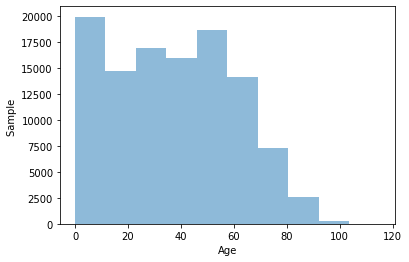

In [116]:
#We will notice that the age-centered sample in the sample is from 0-20
df['Age'].plot(kind='hist',label='Age',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Sample ')
plt.show()


F    71839
M    38687
Name: Gender, dtype: int64

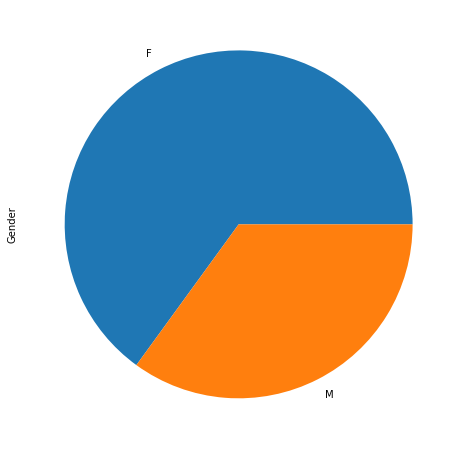

In [103]:
#We note in the female sample that it is more prevalent than the male, male sample 38687 and female sample 71840
df['Gender'].value_counts().plot(kind='pie',figsize=(8,8));
df['Gender'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

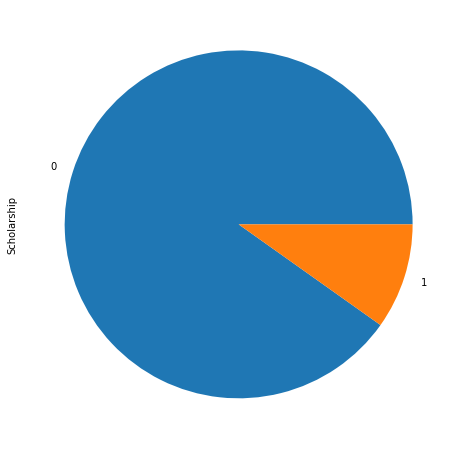

In [18]:
#In the sample who do not have Scholarship they are the most
df['Scholarship'].value_counts().plot(kind='pie',figsize=(8,8));
df['Scholarship'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

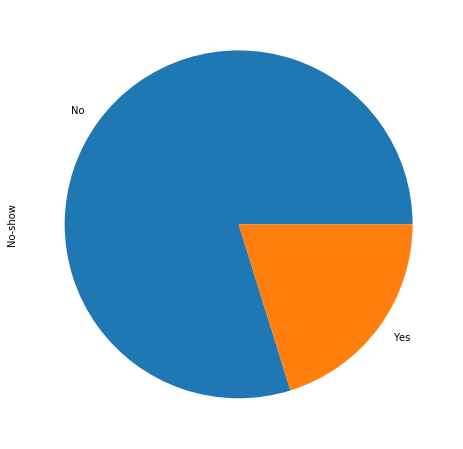

In [19]:
#The number of those who no-show  22319 the appointment and who attended 88207
df['No-show'].value_counts().plot(kind='pie',figsize=(8,8));
df['No-show'].value_counts()

In [44]:
#We will notice the number of new patients 62298
#Whoever visited before (return to visit again) 48228

110526-df.PatientId.nunique()

48228

In [22]:
#Female attendance number 57245.0
#Male attendance number 30962.0
df.loc[(df['No-show']=='No')].groupby(['Age','Gender','No-show']).size().unstack(level=0).sum(axis=1)


Gender  No-show
F       No         57245.0
M       No         30962.0
dtype: float64

In [23]:
#Note that age is a very important factor in attending an appointment, and that the patient cares about his / her health as he gets older
df.loc[(df['Age']>40)].groupby(['Age','Gender','No-show']).size().unstack(level=0).sum(axis=1)

Gender  No-show
F       No         27996.0
        Yes         5946.0
M       No         13250.0
        Yes         2651.0
dtype: float64

In [24]:
#Send a good message to remind the patient

df.loc[(df['SMS_received']==1)].groupby(['SMS_received','Gender','No-show']).size().unstack(level=0).sum(axis=1)

Gender  No-show
F       No         17482
        Yes         6720
M       No          8216
        Yes         3064
dtype: int64

In [73]:
#Female Hipertension patients who came to the appointment 12682
#Male Hipertension patients who came to the appointment 5347
df.loc[(df['Hipertension']==1)].groupby(['Hipertension','Gender','No-show']).size().unstack(level=0).sum(axis=1)

Gender  No-show
F       No         12682
        Yes         2657
M       No          5347
        Yes         1115
dtype: int64

In [77]:
#Female Diabetes patients who came to the appointment 4589
#Male Diabetes patients who came to the appointment 1924
df.loc[(df['Diabetes']==1)].groupby(['Diabetes','Gender','No-show']).size().unstack(level=0).sum(axis=1)

Gender  No-show
F       No         4589
        Yes        1017
M       No         1924
        Yes         413
dtype: int64

In [86]:
#Female Alcoholism patients who came to the appointment   1047
#Male Alcoholism patients who came to the appointment  
df.loc[(df['Handcap']>=1)].groupby(['Handcap','Gender','No-show']).size().unstack(level=0).sum(axis=1)

Gender  No-show
F       No         1047.0
        Yes         243.0
M       No          787.0
        Yes         164.0
dtype: float64

In [80]:
#Female Alcoholism patients who came to the appointment 915
#Male Alcoholism patients who came to the appointment  1768

df.loc[(df['Alcoholism']==1)].groupby(['Alcoholism','Gender','No-show']).size().unstack(level=0).sum(axis=1)

Gender  No-show
F       No          915
        Yes         308
M       No         1768
        Yes         369
dtype: int64

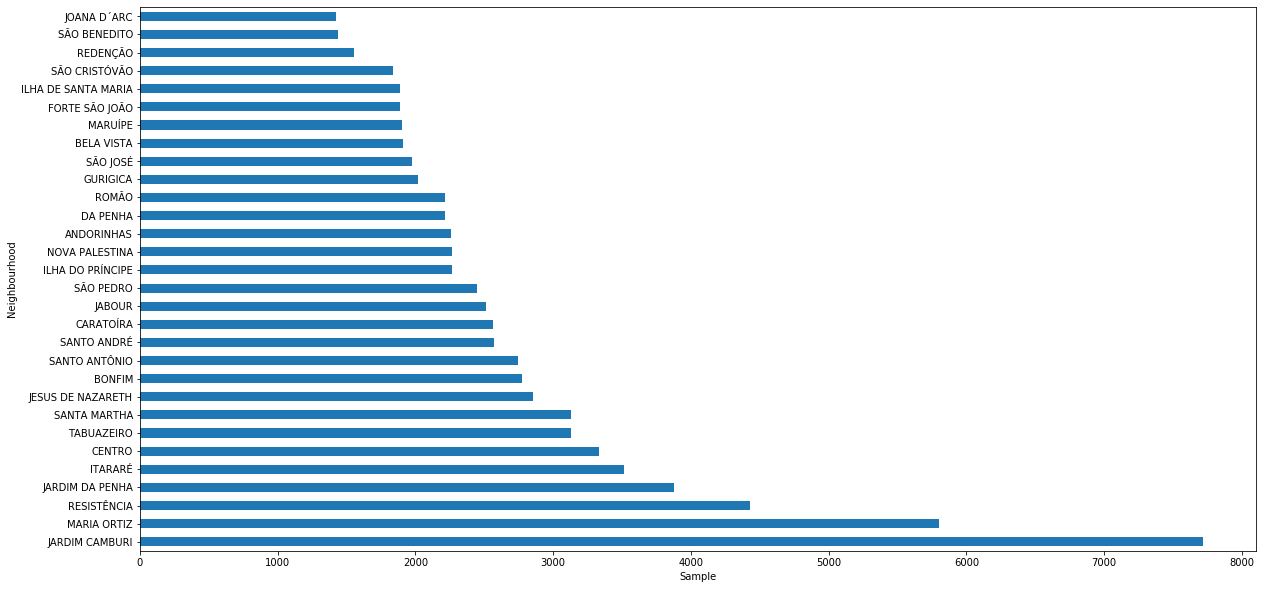

In [118]:
#A general view of the neighborhoods in the sample 
#We will notice that most biology is in the sample from jardim camburi

df['Neighbourhood'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
plt.ylabel('Neighbourhood')
plt.xlabel('Sample')
plt.show()


Text(0.5, 1, 'Correlation matrix')

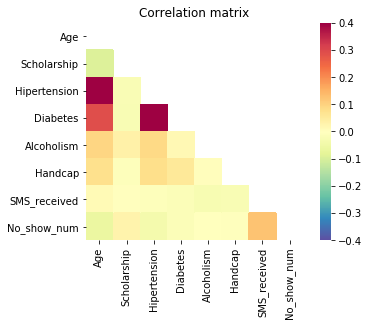

In [144]:
#Correlation matrix. Warm colors (red) indicate a positive correlation, cool colors (blue) indicate a negative correlation.
#We will notice below:
#1- There is a positive relationship between age and attendance at the appointment
#2- There is a strong relationship between diabetes and hipertension
#3- We notice a good relationship between sending messages and attending at the appointment
#4- There is a strong positive correlation between Get old age and patients with hipertension and diabetes .

corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

<a id='conclusions'></a>
## Conclusions
The data is generally clean, and the presence of problems with 5% what it means is good, we can benefit from it, but we lack some information to estimate for example what is the service provided to the patient, and the ID number is recorded in the event of delay with the reason for the delay mentioned
Q1-Is age related to attendance at the appointment?
Yes, there is a relationship but it is not strong and shows its strength with age and the patient is eager to make an appointment
Q2-Can messages sent help the patient attend?
Yes, there is a good relationship and remember the patient on time
